Below we are importing pandas, and numpy
Then declaring the set1

In [11]:
import pandas as pd
import numpy as np

set1 = pd.read_csv("Solar_flare_RHESSI_2004_05.csv")
method1Data = set1['total.counts']

Now we need to divide set1 into 2 batches for the first and last 4 months

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# Filter data for months 1+2+3+4
cond01 = ((set1['year'] == 2004) & (set1['month'].between(1, 4)))
batch01 = set1[cond01]
batch01x = batch01['x.pos.asec'].values
batch01y = batch01['y.pos.asec'].values
batch01TotalCount = batch01['total.counts'].values

# Min-Max Scaled
batch01Min = batch01TotalCount.min()
batch01Max = batch01TotalCount.max()
batch01Scaled = (batch01TotalCount - batch01Min) / (batch01Max - batch01Min)

# normalized data
batch01Mean = batch01TotalCount.mean()
batch01StdDev = batch01TotalCount.std()
batch01Normalized = (batch01TotalCount - batch01Mean) / batch01StdDev


# Filter data for months 21+22+23+24
cond02 = ((set1['year'] == 2005) & (set1['month'].between(9, 12)))
batch02 = set1[cond02]
batch02x = batch02['x.pos.asec'].values
batch02y = batch02['y.pos.asec'].values
batch02TotalCount = batch02['total.counts'].values

Now we need to do some plotting type beat
for this section we need to go through and add color
Also we need to add some other graphs to show info about the total.counts

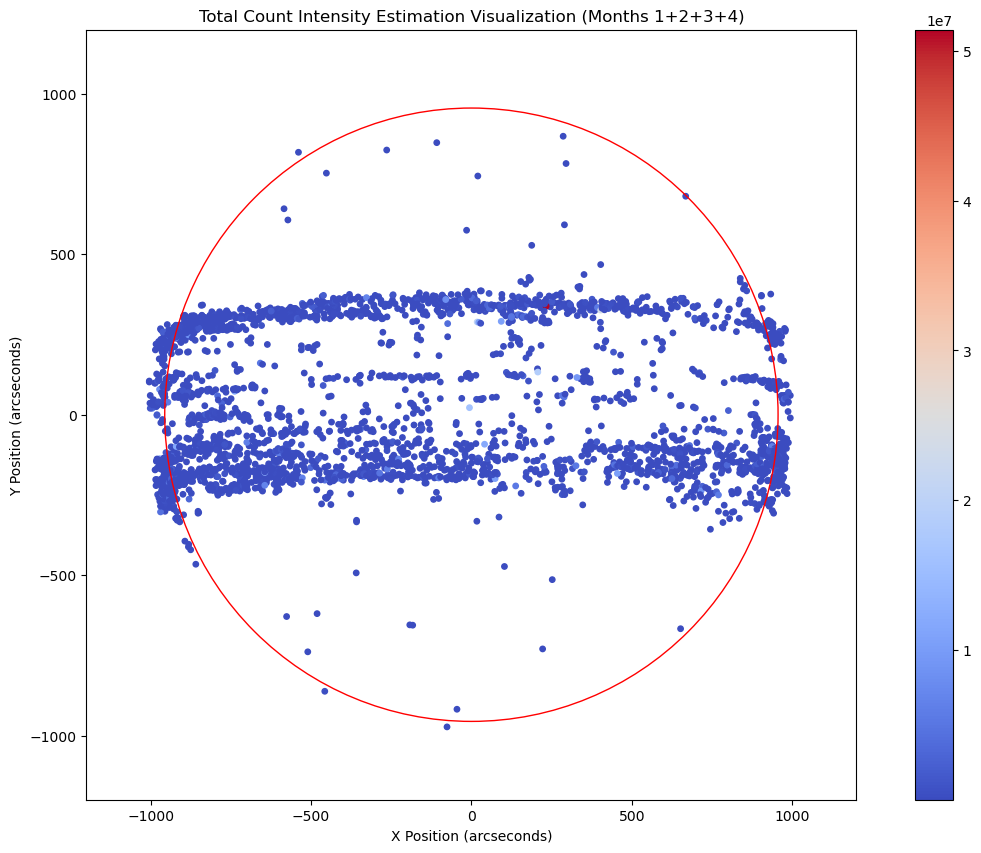

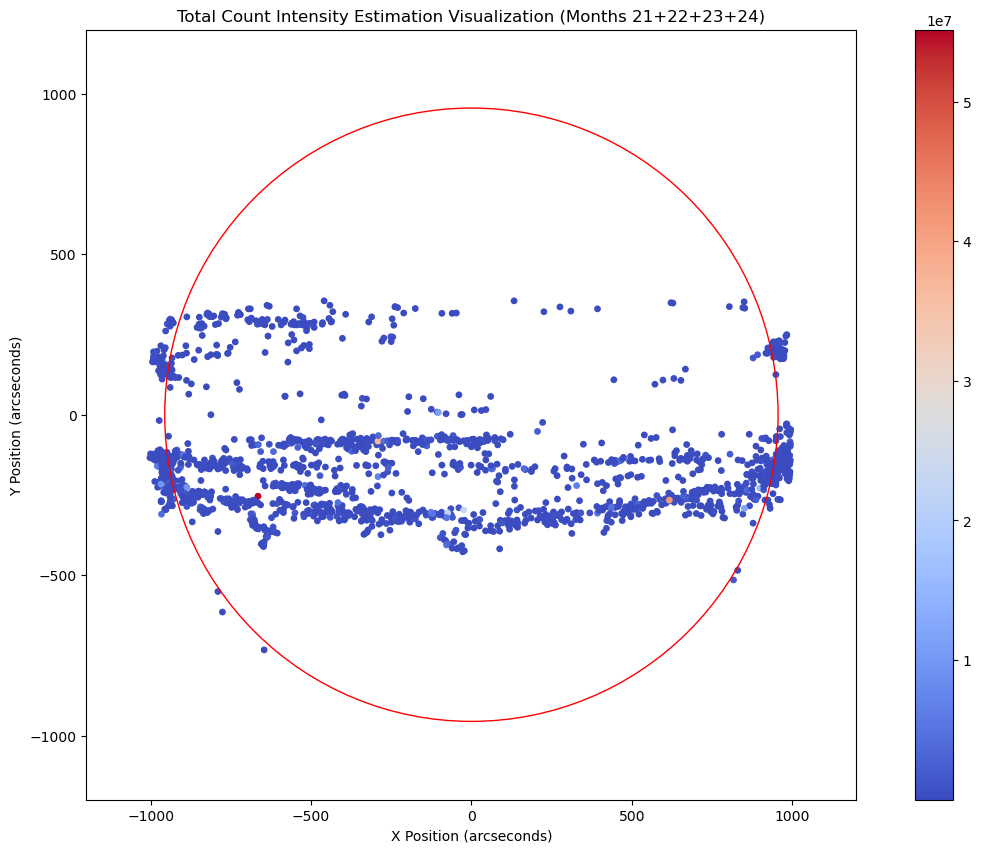

In [43]:
#makes a circle
r_1to4 = np.sqrt(batch01x ** 2 + batch01y ** 2)
t = 80  # percent
r0_1to4 = np.percentile(r_1to4, t)

#plots
plt.figure(figsize=(15, 10))
batch01ScatterPlot = plt.scatter(batch01x, batch01y, c=batch01TotalCount, cmap='coolwarm', s=15)
circle_1to4 = plt.Circle((0, 0), r0_1to4, color='r', fill=False)
plt.gca().add_artist(circle_1to4)
plt.colorbar(batch01ScatterPlot)
plt.title('Total Count Intensity Estimation Visualization (Months 1+2+3+4)')
plt.xlabel('X Position (arcseconds)')
plt.ylabel('Y Position (arcseconds)')
plt.xlim(-1200, 1200)
plt.ylim(-1200, 1200)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

#plots
plt.figure(figsize=(15, 10))
batch02ScatterPlot = plt.scatter(batch02x, batch02y, c=batch02TotalCount, cmap='coolwarm', s=15)
circle_1to4 = plt.Circle((0, 0), r0_1to4, color='r', fill=False)
plt.gca().add_artist(circle_1to4)
plt.colorbar(batch02ScatterPlot)
plt.title('Total Count Intensity Estimation Visualization (Months 21+22+23+24)')
plt.xlabel('X Position (arcseconds)')
plt.ylabel('Y Position (arcseconds)')
plt.xlim(-1200, 1200)
plt.ylim(-1200, 1200)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()